In [ ]:
# Parts of this code are inspired by 
# GeeksforGeeks (2022): Implementing an Autoencoder in PyTorch. Available online at https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/, updated on 7/7/2022, checked on 7/16/2024.

In [ ]:
!pip install torch
!pip install torchvision
!pip install matplotlib
!pip install numpy

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from dataset.cycling_dataset import TorchCyclingDataset
from notebooks.autoencoder.autoencoder import Autoencoder




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mwenn\PycharmProjects\ComTec-I\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\mwenn\PycharmProjects\ComTec-I\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mwenn\PycharmProjects\ComTec-I\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io

In [2]:
# Load preprocessed datasets
backwheel_test = TorchCyclingDataset(file_path_acc="../../data/preprocessed/backwheel_acc_test.h5",
                             file_path_gyro="../../data/preprocessed/backwheel_gyro_test.h5")
backwheel_train = TorchCyclingDataset(file_path_acc="../../data/preprocessed/backwheel_acc_train.h5",
                              file_path_gyro="../../data/preprocessed/backwheel_gyro_train.h5")

handlebar_test = TorchCyclingDataset(file_path_acc="../../data/preprocessed/handlebar_acc_test.h5",
                             file_path_gyro="../../data/preprocessed/handlebar_gyro_test.h5")
handlebar_train = TorchCyclingDataset(file_path_acc="../../data/preprocessed/handlebar_acc_train.h5",
                              file_path_gyro="../../data/preprocessed/handlebar_gyro_train.h5")

In [3]:
# DataLoader is used to load the dataset 
# for training
backwheel_test_loader = torch.utils.data.DataLoader(dataset = backwheel_test,
                                     batch_size = 8,
                                     shuffle = True)
backwheel_train_loader = torch.utils.data.DataLoader(dataset = backwheel_train,
                                     batch_size = 8,
                                     shuffle = True)

handlebar_test_loader = torch.utils.data.DataLoader(dataset = handlebar_test,
                                     batch_size = 8,
                                     shuffle = True)
handlebar_train_loader = torch.utils.data.DataLoader(dataset = handlebar_train,
                                     batch_size = 8,
                                     shuffle = True)

In [4]:
# Autoencoder model
shape = next(iter(handlebar_train)).shape
model = Autoencoder(input_dim=shape, latent_feature_count=100)
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)

In [8]:
# backwheel
epochs = 50
outputs = []
losses = []
for epoch in range(epochs):
    for data in backwheel_train_loader:
        # Output of Autoencoder
        reconstructed = model(data)
        
        # Calculating the loss function
        loss = loss_function(reconstructed, data)
        
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Storing the losses in a list for plotting
        losses.append(loss.item())
    outputs.append((epochs, data, reconstructed))

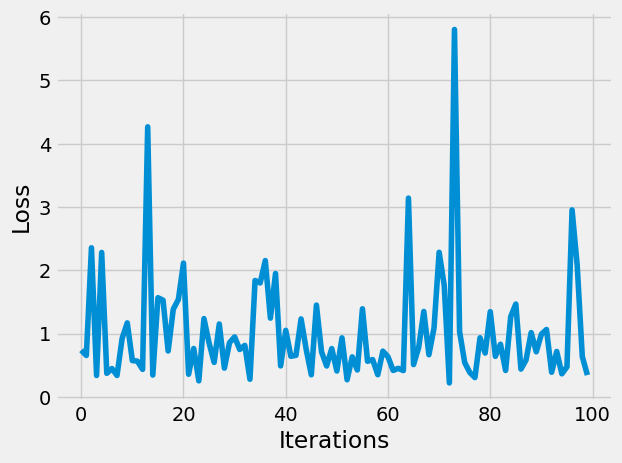

In [9]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting
plt.plot(losses[-100:])